# Plots and numbers: domain average ET

In [4]:
import xarray as xr
import numpy as np
import pandas as pd
import os
import sys
import glob
import xesmf as xe
from pyproj import Proj
import cartopy.crs as ccrs
from pyproj import Proj
import cartopy.feature as cfeature
import geopandas as gp
import regionmask
import xesmf as xe
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns

new_path = '/home/566/ad9701/wrf_hydro/'
if new_path not in sys.path:
    sys.path.append(new_path)
import wrf_hydro_analyses_funcs as myhydro

new_path = '/home/566/ad9701/drought_probability/final_code_AU/'
if new_path not in sys.path:
    sys.path.append(new_path)
import validation_functions as myfuncs

SMALL_SIZE = 11
MEDIUM_SIZE = 12
BIGGER_SIZE = 12

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

### Modelled domain avg ET

In [5]:
wrf_hydro_ctl_list = ['/g/data/w97/ad9701/WRF-Hydro/SEA/noGW_runs/runs_wCalibPars_1km/wrf_hydro_nwm_public-5.2.0_domain4_1km_monPnTCorr_LSMonly_defSoil_defPar/trunk/NDHMS/Run/OUTPUT/DAILY_FILES/',
                      '/g/data/w97/ad9701/WRF-Hydro/SEA/noGW_runs/runs_wCalibPars_4km/wrf_hydro_nwm_public-5.2.0_domain4_4km_monPnTCorr_LSMonly_defSoil_defPar/trunk/NDHMS/Run/OUTPUT/DAILY_FILES/',
                      '/g/data/w97/ad9701/WRF-Hydro/SEA/noGW_runs/runs_wCalibPars_10km/wrf_hydro_nwm_public-5.2.0_domain4_10km_monPnTCorr_LSMonly_defSoil_defPar/trunk/NDHMS/Run/OUTPUT/DAILY_FILES/']
ctl_name_list = ['defSoil_defPar_1km', 'defSoil_defPar_4km', 'defSoil_defPar_10km']

wrf_hydro_lat_list = ['/g/data/w28/ad9701/WRF-Hydro/SEA/noGW_runs/runs_wCalibPars_1km_100mRT/output_wrf_hydro_nwm_public-5.2.0_domain4_1km_monPnTCorr_t500_RTCHon_monPnTCorr_defSoil_defPar/OUTPUT/DAILY_FILES/',
                      '/g/data/w97/ad9701/WRF-Hydro/SEA/noGW_runs/runs_wCalibPars_4km_100mRT/wrf_hydro_nwm_public-5.2.0_domain4_4km_t500_RTCHon_4g_monPnTCorr_defSoil_defPar/trunk/NDHMS/Run/OUTPUT/DAILY_FILES/',
                      '/g/data/w97/ad9701/WRF-Hydro/SEA/noGW_runs/runs_wCalibPars_10km_100mRT/wrf_hydro_nwm_public-5.2.0_trial2/trunk/NDHMS/Run/OUTPUT/DAILY_FILES/']
run_name_list = ['defSoil_defPar_1km_100RT', 'defSoil_defPar_4km_100RT', 'defSoil_defPar_10km_100RT']

wrf_hydro_lat_list_250 = ['/g/data/w97/ad9701/WRF-Hydro/SEA/noGW_runs/runs_wCalibPars_1km/wrf_hydro_nwm_public-5.2.0_domain4_1km_monPnTCorr_t80_RTCHon_monPnTCorr_defSoil_defPar/trunk/NDHMS/Run/OUTPUT/DAILY_FILES/',
                      '/g/data/w97/ad9701/WRF-Hydro/SEA/noGW_runs/runs_wCalibPars_4km/wrf_hydro_nwm_public-5.2.0_domain4_4km_t80_RTCHon_12g_monPnTCorr_defSoil_defPar/trunk/NDHMS/Run/OUTPUT/DAILY_FILES/',
                      '/g/data/w97/ad9701/WRF-Hydro/SEA/noGW_runs/runs_wCalibPars_10km/wrf_hydro_nwm_public-5.2.0_domain4_10km_monPnTCorr_t80_RTCHon_defSoil_defPar/trunk/NDHMS/Run/OUTPUT/DAILY_FILES/']
run_name_list_250 = ['defSoil_defPar_1km_250RT', 'defSoil_defPar_4km_250RT', 'defSoil_defPar_10km_250RT']

In [6]:
# read in domain average monthly data from the saved files

mdlVar = 'ET'
varInFile = 'ACCET'

list_all_da_mdl_domAvg_sets = []
for dir_list in [wrf_hydro_ctl_list, wrf_hydro_lat_list, wrf_hydro_lat_list_250]:
    list_da_mdl_domAvg = []
    for mdl_dir in dir_list:
        print(mdl_dir)
        # note: the file name is wrong. It says daily but I've saved monthly data
        ds_mdl_domAvg = xr.open_dataset(mdl_dir + 'domainAvg/' + mdlVar + '_monthly.nc')
        da_mdl_domAvg = ds_mdl_domAvg[varInFile].rename('ET')
        list_da_mdl_domAvg.append(da_mdl_domAvg)
    list_all_da_mdl_domAvg_sets.append(list_da_mdl_domAvg)

/g/data/w97/ad9701/WRF-Hydro/SEA/noGW_runs/runs_wCalibPars_1km/wrf_hydro_nwm_public-5.2.0_domain4_1km_monPnTCorr_LSMonly_defSoil_defPar/trunk/NDHMS/Run/OUTPUT/DAILY_FILES/
/g/data/w97/ad9701/WRF-Hydro/SEA/noGW_runs/runs_wCalibPars_4km/wrf_hydro_nwm_public-5.2.0_domain4_4km_monPnTCorr_LSMonly_defSoil_defPar/trunk/NDHMS/Run/OUTPUT/DAILY_FILES/
/g/data/w97/ad9701/WRF-Hydro/SEA/noGW_runs/runs_wCalibPars_10km/wrf_hydro_nwm_public-5.2.0_domain4_10km_monPnTCorr_LSMonly_defSoil_defPar/trunk/NDHMS/Run/OUTPUT/DAILY_FILES/
/g/data/w28/ad9701/WRF-Hydro/SEA/noGW_runs/runs_wCalibPars_1km_100mRT/output_wrf_hydro_nwm_public-5.2.0_domain4_1km_monPnTCorr_t500_RTCHon_monPnTCorr_defSoil_defPar/OUTPUT/DAILY_FILES/
/g/data/w97/ad9701/WRF-Hydro/SEA/noGW_runs/runs_wCalibPars_4km_100mRT/wrf_hydro_nwm_public-5.2.0_domain4_4km_t500_RTCHon_4g_monPnTCorr_defSoil_defPar/trunk/NDHMS/Run/OUTPUT/DAILY_FILES/
/g/data/w97/ad9701/WRF-Hydro/SEA/noGW_runs/runs_wCalibPars_10km_100mRT/wrf_hydro_nwm_public-5.2.0_trial2/trunk/

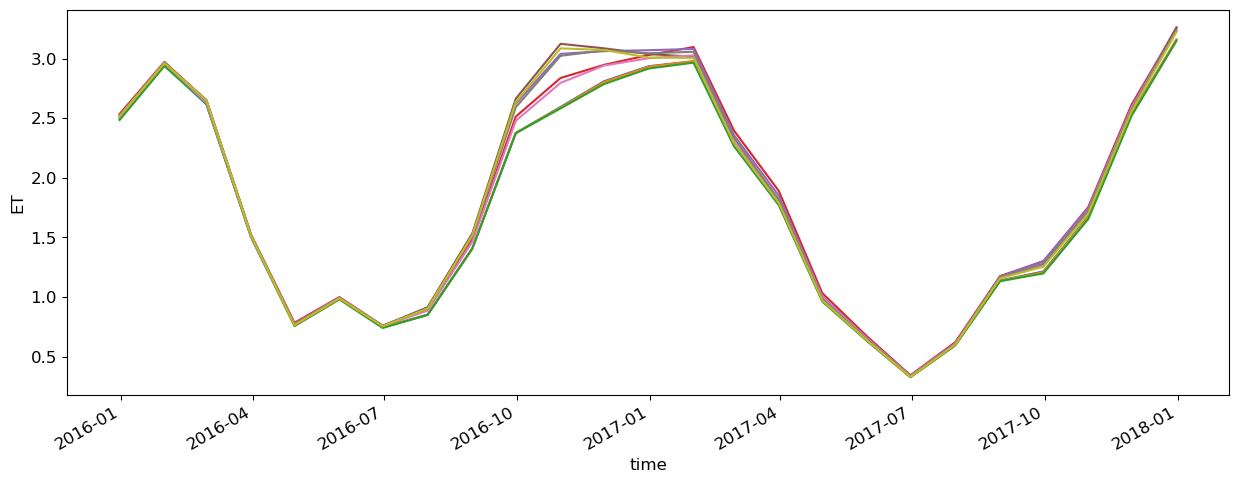

In [7]:
list_all_da_mdl_domAvg_sets[0][0].sel(time = slice('2015-12', '2017-12')).plot(size=5, aspect=3)
list_all_da_mdl_domAvg_sets[0][1].sel(time = slice('2015-12', '2017-12')).plot()
list_all_da_mdl_domAvg_sets[0][2].sel(time = slice('2015-12', '2017-12')).plot()

list_all_da_mdl_domAvg_sets[1][0].sel(time = slice('2015-12', '2017-12')).plot()
list_all_da_mdl_domAvg_sets[1][1].sel(time = slice('2015-12', '2017-12')).plot()
list_all_da_mdl_domAvg_sets[1][2].sel(time = slice('2015-12', '2017-12')).plot()

list_all_da_mdl_domAvg_sets[2][0].sel(time = slice('2015-12', '2017-12')).plot()
list_all_da_mdl_domAvg_sets[2][1].sel(time = slice('2015-12', '2017-12')).plot()
list_all_da_mdl_domAvg_sets[2][2].sel(time = slice('2015-12', '2017-12')).plot()

### Saved domain average ET data in netcdf files using the below code

In [13]:
# def get_daily_ET_fromAccum(mdlDir, accet_file = 'ACCET_concatTime.nc', varname = 'ACCET', newVar = 'ET'):
#     ds_accet = xr.open_dataset(mdlDir + accet_file)
#     # select the 00 hour from each file & calculate diff to get the daily values
#     ds_accet_00hr = ds_accet.isel(time=ds_accet.time.dt.hour.isin([0]))
#     ds_et_daily = ds_accet_00hr.diff('time').shift(time = -1)
#     da_et_daily = ds_et_daily[varname]#.rename({varname: newVar}).assign_attrs({'units': 'mm/day'})
#     return da_et_daily

# mdlVar = 'ET'
# # regrid obs and calc domain avg for each resolution
# for dir_list in [wrf_hydro_ctl_list, wrf_hydro_lat_list, wrf_hydro_lat_list_250]:
#     # list_da_mdl_domAvg = []
#     # regrid obs to model grid & calculate domain average
#     for mdl_dir in dir_list:
#         da_mdl = get_daily_ET_fromAccum(mdl_dir)
#         da_mdl = da_mdl.resample(time = 'M').mean()
#         da_mdl_domAvg = da_mdl.mean(['x', 'y'])
#         # save the data in a netcdf file & read it in later

#         out_dir = mdl_dir + 'domainAvg/'
#         if not os.path.exists(out_dir):
#             os.makedirs(out_dir)
#         out_file = out_dir + mdlVar + '_monthly.nc'
#         print(out_file)
#         da_mdl_domAvg.to_netcdf(out_file)

#     #     list_da_mdl_domAvg.append(da_mdl_domAvg)
#     # list_all_da_mdl_domAvg_sets.append(list_da_mdl_domAvg)

#### DOLCE ET Calculated using notebook: calculate_DOLCE_ET.ipynb

In [12]:
file_dolce_et = '/g/data/w97/ad9701/DOLCE_ET/DOLCE_v3_ET_2015_to_2017_largerArea.nc'
ds_dolce = xr.open_dataset(file_dolce_et)

########################################
# create a regionmask of the domain
########################################
# read in the domain shapefile
domain4 = gp.read_file('/g/data/w97/ad9701/WRF-Hydro/SEA/routing_stack/SEA_domain4_4km/SEA_domain4_4km_WGS.shp')
# create a mask of the polygon for the lat-long values in ds. The mask would contain '0' inside the region; nan otherwise
da_mask_zeros = regionmask.mask_geopandas(geodataframe = domain4, lon_or_obj = ds_dolce.lon.values, lat = ds_dolce.lat.values, wrap_lon = False)
# setting the points inside the region to 1
da_mask = xr.where(da_mask_zeros == 0, 1, np.nan)
# da_mask.plot()

da_dolce_avg = (ds_dolce['ET']*da_mask).mean(['lat', 'lon'])
da_dolce_lower_avg = (ds_dolce['ET_lower_bound']*da_mask).mean(['lat', 'lon'])
da_dolce_upper_avg = (ds_dolce['ET_upper_bound']*da_mask).mean(['lat', 'lon'])

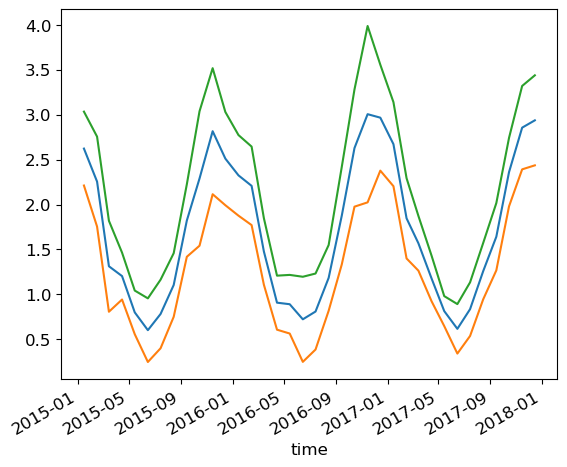

In [13]:
da_dolce_avg.plot()
da_dolce_lower_avg.plot()
da_dolce_upper_avg.plot()

### MODIS ET

In [8]:
modisVar = 'ET_500m'

terra_file = '/g/data/w97/ad9701/WRF-Hydro/SEA/MODIS_ET_LE_geog/SEA_Terra_NetET_LE_GapFilled/MOD16A2GF.061_ET_subset_mmpday.nc'
aqua_file = '/g/data/w97/ad9701/WRF-Hydro/SEA/MODIS_ET_LE_geog/SEA_Aqua_NetET_LE_GapFilled/MYD16A2GF.061_ET_subset_mmpday.nc'
ds_terra = xr.open_dataset(terra_file)
ds_aqua = xr.open_dataset(aqua_file)
da_obs = (ds_terra[modisVar] + ds_aqua[modisVar])/2
da_obs_mon = da_obs.resample(time = 'M').mean()

In [9]:
########################################
# create a regionmask of the domain
########################################
# read in the domain shapefile
domain4 = gp.read_file('/g/data/w97/ad9701/WRF-Hydro/SEA/routing_stack/SEA_domain4_4km/SEA_domain4_4km_WGS.shp')
# create a mask of the polygon for the lat-long values in ds. The mask would contain '0' inside the region; nan otherwise
da_mask_zeros = regionmask.mask_geopandas(geodataframe = domain4, lon_or_obj = da_obs_mon.lon.values, lat = da_obs_mon.lat.values, wrap_lon = False)
# setting the points inside the region to 1
da_mask = xr.where(da_mask_zeros == 0, 1, np.nan)
# da_mask.plot()

da_modis_avg = (da_obs_mon*da_mask).mean(['lat', 'lon'])

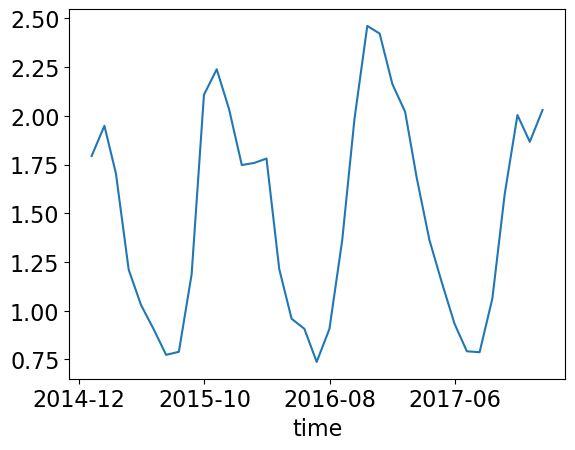

In [10]:
da_modis_avg.plot()

In [20]:
list_all_da_mdl_domAvg_sets[0][0].time.values

array(['2013-01-31T00:00:00.000000000', '2013-02-28T00:00:00.000000000',
       '2013-03-31T00:00:00.000000000', '2013-04-30T00:00:00.000000000',
       '2013-05-31T00:00:00.000000000', '2013-06-30T00:00:00.000000000',
       '2013-07-31T00:00:00.000000000', '2013-08-31T00:00:00.000000000',
       '2013-09-30T00:00:00.000000000', '2013-10-31T00:00:00.000000000',
       '2013-11-30T00:00:00.000000000', '2013-12-31T00:00:00.000000000',
       '2014-01-31T00:00:00.000000000', '2014-02-28T00:00:00.000000000',
       '2014-03-31T00:00:00.000000000', '2014-04-30T00:00:00.000000000',
       '2014-05-31T00:00:00.000000000', '2014-06-30T00:00:00.000000000',
       '2014-07-31T00:00:00.000000000', '2014-08-31T00:00:00.000000000',
       '2014-09-30T00:00:00.000000000', '2014-10-31T00:00:00.000000000',
       '2014-11-30T00:00:00.000000000', '2014-12-31T00:00:00.000000000',
       '2015-01-31T00:00:00.000000000', '2015-02-28T00:00:00.000000000',
       '2015-03-31T00:00:00.000000000', '2015-04-30

### CMRSET AET

In [8]:
# reading in pre-calculated domain average. domain average is calculated using code snippet in the notebook CMRSET_AET.ipynb 
cmrset_var = 'ETa'
cmrset_file = '/g/data/w97/ad9701/CMRSET_AET/SEA_dom4_clip/domAvg/CMRSET_LANDSAT_v2_2_ETa.nc'
ds_cmrset_avg = xr.open_dataset(cmrset_file)
da_cmrset_avg = ds_cmrset_avg[cmrset_var]

In [9]:
da_cmrset_avg

<xarray.DataArray 'ETa' (time: 25)>
[25 values with dtype=float64]
Coordinates:
    spatial_ref  int64 ...
  * time         (time) datetime64[ns] 2015-12-01 2016-01-01 ... 2017-12-01

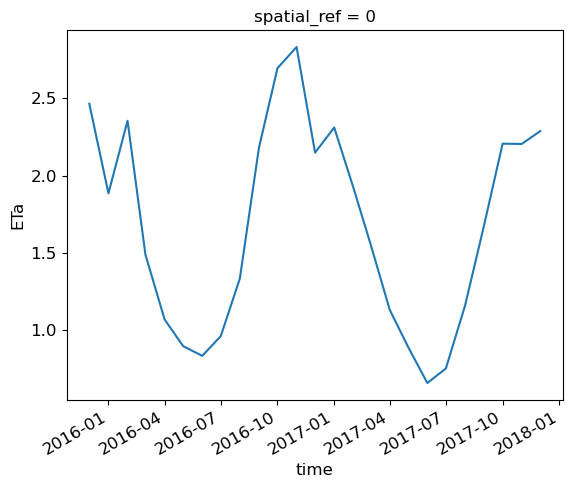

In [10]:
(da_cmrset_avg/1000).plot()

In [22]:
da_cmrset_avg.time.values

array(['2015-12-01T00:00:00.000000000', '2016-01-01T00:00:00.000000000',
       '2016-02-01T00:00:00.000000000', '2016-03-01T00:00:00.000000000',
       '2016-04-01T00:00:00.000000000', '2016-05-01T00:00:00.000000000',
       '2016-06-01T00:00:00.000000000', '2016-07-01T00:00:00.000000000',
       '2016-08-01T00:00:00.000000000', '2016-09-01T00:00:00.000000000',
       '2016-10-01T00:00:00.000000000', '2016-11-01T00:00:00.000000000',
       '2016-12-01T00:00:00.000000000', '2017-01-01T00:00:00.000000000',
       '2017-02-01T00:00:00.000000000', '2017-03-01T00:00:00.000000000',
       '2017-04-01T00:00:00.000000000', '2017-05-01T00:00:00.000000000',
       '2017-06-01T00:00:00.000000000', '2017-07-01T00:00:00.000000000',
       '2017-08-01T00:00:00.000000000', '2017-09-01T00:00:00.000000000',
       '2017-10-01T00:00:00.000000000', '2017-11-01T00:00:00.000000000',
       '2017-12-01T00:00:00.000000000'], dtype='datetime64[ns]')

### Plot

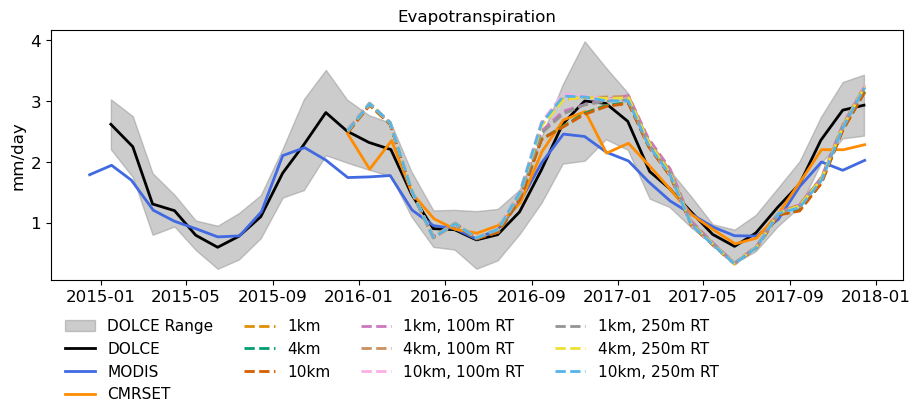

In [36]:
out_dir = '/home/566/ad9701/figures/wrf_hydro_standalone/finalRuns_allRes_noBaseFlow/calib_eval/compare_MODIS_CMRSET_ET/'

nrows=1
fig, axs = plt.subplots(nrows=nrows, ncols=1, figsize=(11,3.25*nrows), sharex='col') #width, height
fig.subplots_adjust(wspace=0.14, hspace=0.05) 

time_sel = slice('2015-12', '2017-12')

modis_col = 'royalblue'
dolce_col = 'black'
dolce_shade = 'grey'
cmrset_col = 'darkorange'

mdl_plot_list = list_all_da_mdl_domAvg_sets[0] + list_all_da_mdl_domAvg_sets[1] + list_all_da_mdl_domAvg_sets[2]
mdl_plot_list = [da.sel(time = time_sel) for da in mdl_plot_list]

ctl_name_short = ['1km', '4km', '10km']
lat_name_short = ['1km, 100m RT', '4km, 100m RT', '10km, 100m RT']
lat_name_250_short = ['1km, 250m RT', '4km, 250m RT', '10km, 250m RT']

# mdl_label_list = ctl_name_list + run_name_list + run_name_list_250
mdl_label_list = ctl_name_short + lat_name_short + lat_name_250_short
model_colors = sns.color_palette('colorblind')[1:len(mdl_plot_list)+1]

# da_obs_forPlot = list_all_da_obs_reg_domAvg_sets[0][0].sel(time = time_sel)

axs.fill_between(da_dolce_avg.time.values, y1=da_dolce_lower_avg.values, y2=da_dolce_upper_avg.values, color = dolce_shade, alpha=0.4, label='DOLCE Range')
axs.plot(da_dolce_avg.time.values, da_dolce_avg.values, color = dolce_col, linewidth = 2, label = 'DOLCE')

xval = [np.datetime64(x) for x in da_modis_avg.time.values]
xval = [x - np.timedelta64(15, 'D') for x in xval] # centre the data point on the month
axs.plot(xval, da_modis_avg.values, color = modis_col, linewidth = 2, label = 'MODIS')

xval = [x + np.timedelta64(15, 'D') for x in da_cmrset_avg.time.values]
axs.plot(xval, da_cmrset_avg.values/1000, color = cmrset_col, linewidth = 2, label = 'CMRSET')

for da_mdl, name, col in zip(mdl_plot_list, mdl_label_list, model_colors):
    xval = da_mdl.time.values - np.timedelta64(15, 'D')
    axs.plot(xval, da_mdl.values, color = col, linewidth = 2, linestyle = '--', label=name)

axs.set_title('Evapotranspiration')
axs.set_ylabel('mm/day')
axs.legend(bbox_to_anchor=(0, -0.1, 0, 0), ncol=4, loc=2, frameon=False)

plt.savefig(out_dir + 'timeseries_domainAvg_model_compare_MODIS_CMRSET_and_DOLCE.png', dpi = 600, bbox_inches='tight')
plt.savefig(out_dir + 'timeseries_domainAvg_model_compare_MODIS_CMRSET_and_DOLCE.pdf', format = 'pdf', bbox_inches='tight')

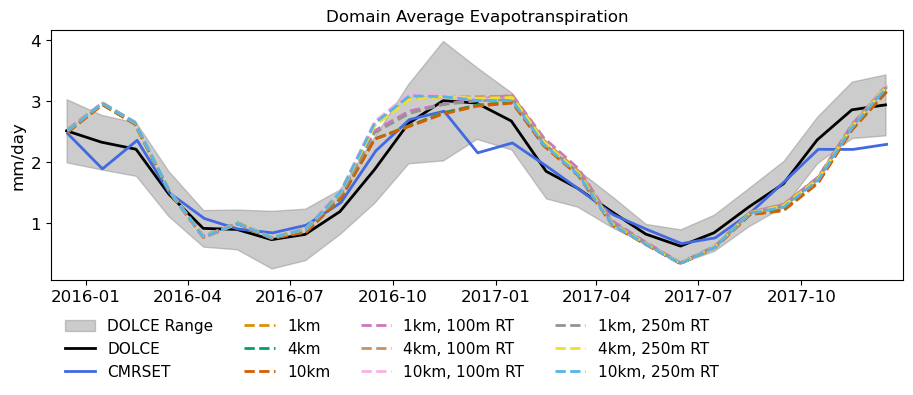

In [27]:
out_dir = '/home/566/ad9701/figures/wrf_hydro_standalone/finalRuns_allRes_noBaseFlow/calib_eval/compare_MODIS_CMRSET_ET/'

nrows=1
fig, axs = plt.subplots(nrows=nrows, ncols=1, figsize=(11,3.25*nrows), sharex='col') #width, height
fig.subplots_adjust(wspace=0.14, hspace=0.05) 

time_sel = slice('2015-12', '2017-12')

# modis_col = 'royalblue'
dolce_col = 'black'
dolce_shade = 'grey'
cmrset_col = 'royalblue'

mdl_plot_list = list_all_da_mdl_domAvg_sets[0] + list_all_da_mdl_domAvg_sets[1] + list_all_da_mdl_domAvg_sets[2]
mdl_plot_list = [da.sel(time = time_sel) for da in mdl_plot_list]

ctl_name_short = ['1km', '4km', '10km']
lat_name_short = ['1km, 100m RT', '4km, 100m RT', '10km, 100m RT']
lat_name_250_short = ['1km, 250m RT', '4km, 250m RT', '10km, 250m RT']

# mdl_label_list = ctl_name_list + run_name_list + run_name_list_250
mdl_label_list = ctl_name_short + lat_name_short + lat_name_250_short
model_colors = sns.color_palette('colorblind')[1:len(mdl_plot_list)+1]

# da_obs_forPlot = list_all_da_obs_reg_domAvg_sets[0][0].sel(time = time_sel)

da_dolce_avg = da_dolce_avg.sel(time = time_sel)
da_dolce_lower_avg = da_dolce_lower_avg.sel(time = time_sel)
da_dolce_upper_avg = da_dolce_upper_avg.sel(time = time_sel)
axs.fill_between(da_dolce_avg.time.values, y1=da_dolce_lower_avg.values, y2=da_dolce_upper_avg.values, color = dolce_shade, alpha=0.4, label='DOLCE Range')
axs.plot(da_dolce_avg.time.values, da_dolce_avg.values, color = dolce_col, linewidth = 2, label = 'DOLCE')

# xval = [np.datetime64(x) for x in da_modis_avg.time.values]
# xval = [x - np.timedelta64(15, 'D') for x in xval] # centre the data point on the month
# axs.plot(xval, da_modis_avg.values, color = modis_col, linewidth = 2, label = 'MODIS')

xval = [x + np.timedelta64(15, 'D') for x in da_cmrset_avg.time.values]
axs.plot(xval, da_cmrset_avg.values/1000, color = cmrset_col, linewidth = 2, label = 'CMRSET')

for da_mdl, name, col in zip(mdl_plot_list, mdl_label_list, model_colors):
    xval = da_mdl.time.values - np.timedelta64(15, 'D')
    axs.plot(xval, da_mdl.values, color = col, linewidth = 2, linestyle = '--', label=name)

axs.set_title('Domain Average Evapotranspiration')
axs.set_ylabel('mm/day')
axs.set_xlim((da_cmrset_avg.time.values[0], da_cmrset_avg.time.values[-1]+np.timedelta64(30, 'D')))
axs.legend(bbox_to_anchor=(0, -0.1, 0, 0), ncol=4, loc=2, frameon=False)

plt.savefig(out_dir + 'timeseries_domainAvg_model_compare_CMRSET_and_DOLCE_v2.png', dpi = 600, bbox_inches='tight')
plt.savefig(out_dir + 'timeseries_domainAvg_model_compare_CMRSET_and_DOLCE_v2.pdf', format = 'pdf', bbox_inches='tight')

In [26]:
out_dir

'/home/566/ad9701/figures/wrf_hydro_standalone/finalRuns_allRes_noBaseFlow/calib_eval/compare_MODIS_CMRSET_ET/'

### Deviation numbers

In [31]:
# setting all time dimensions to that of dolce

da_mdl_domAvg = xr.concat(mdl_plot_list, dim = 'sim').assign_coords({'sim': mdl_label_list})
da_mdl_domAvg = da_mdl_domAvg.assign_coords({'time': da_dolce_lower_avg.time.values})

da_cmrset_avg_mmperday = (da_cmrset_avg/1000).assign_coords({'time': da_dolce_lower_avg.time.values})

da_mdl_temp_1 = da_mdl_domAvg - da_dolce_lower_avg
da_mdl_temp_2 = da_mdl_domAvg - da_dolce_upper_avg
da_mdl_bias_wrt_dolce = xr.where((da_mdl_domAvg > da_dolce_upper_avg) | (da_mdl_domAvg < da_dolce_lower_avg), da_mdl_temp_1, np.nan)
da_mdl_bias_wrt_dolce = xr.where((da_mdl_domAvg > da_dolce_upper_avg) & (~np.isnan(da_mdl_bias_wrt_dolce)), da_mdl_temp_2, da_mdl_bias_wrt_dolce)
da_mdl_bias_wrt_dolce

<xarray.DataArray (sim: 9, time: 25)>
array([[        nan,  0.17212991,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan, -0.00686027, -0.00951337,         nan,
                nan, -0.05259155, -0.30523733,         nan,         nan],
       [        nan,  0.17510752,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan, -0.01149811, -0.01193165,         nan,
                nan, -0.05854772, -0.311757  ,         nan,         nan],
       [        nan,  0.16459278,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan, -0.01680155, -0.01502719,         nan,
                nan, -0.06925927, -0.32592849,         nan,         nan],
       [        nan,  0.19917754,  0.00380316,         nan,         nan,
                nan,         nan,         nan,         nan,  0.09393268,
                nan,         nan,         nan,         nan,  0.10263803,
         0.01593607,         nan,         nan,         nan,         nan,
                nan,         nan, -0.22512988,         nan,         nan],
...
       [        nan,  0.18855981,  0.00735298,         nan,         nan,
                nan,         nan,         nan,         nan,  0.24426131,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan, -0.01004286, -0.01137679,         nan,
                nan,         nan, -0.26859061,         nan,         nan],
       [        nan,  0.19160656,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,  0.05876856,
                nan,         nan,         nan,         nan,  0.00987556,
                nan,         nan,         nan, -0.00548517,         nan,
                nan,         nan, -0.25329331,         nan,         nan],
       [        nan,  0.19136147,  0.00322381,         nan,         nan,
                nan,         nan,         nan,         nan,  0.17206984,
                nan,         nan,         nan,         nan,  0.04071048,
                nan,         nan, -0.00291176, -0.008208  ,         nan,
                nan,         nan, -0.25698832,         nan,         nan],
       [        nan,  0.18849687,  0.00697938,         nan,         nan,
                nan,         nan,         nan,         nan,  0.21623402,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan, -0.01109685, -0.01215821,         nan,
                nan, -0.01272319, -0.27817229,         nan,         nan]])
Coordinates:
  * sim      (sim) <U13 '1km' '4km' '10km' ... '4km, 250m RT' '10km, 250m RT'
  * time     (time) datetime64[ns] 2015-12-15 2016-01-15 ... 2017-12-15

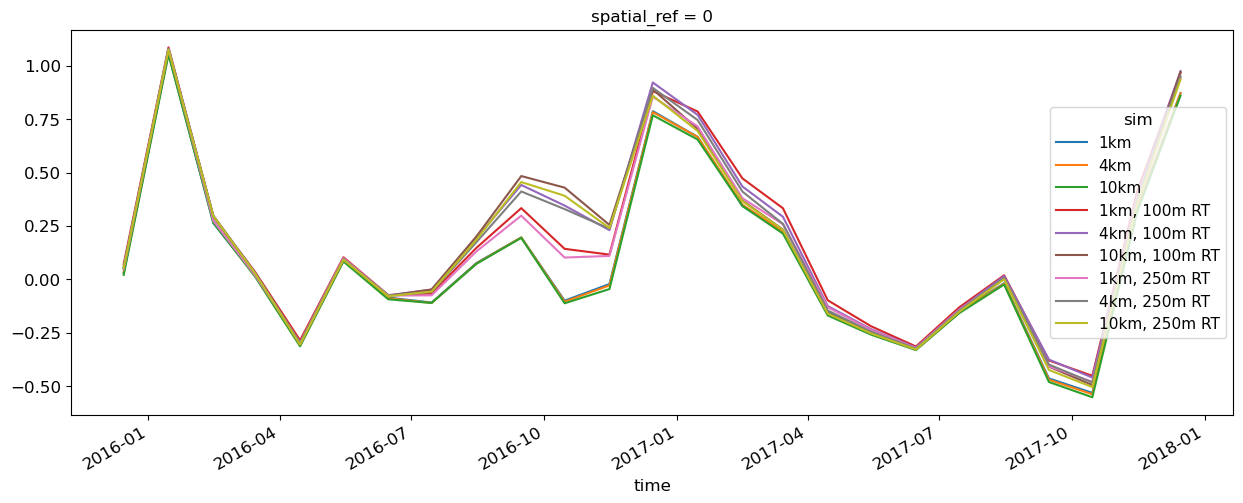

In [38]:
(da_mdl_domAvg - da_cmrset_avg_mmperday).plot(hue = 'sim', size = 5, aspect = 3)

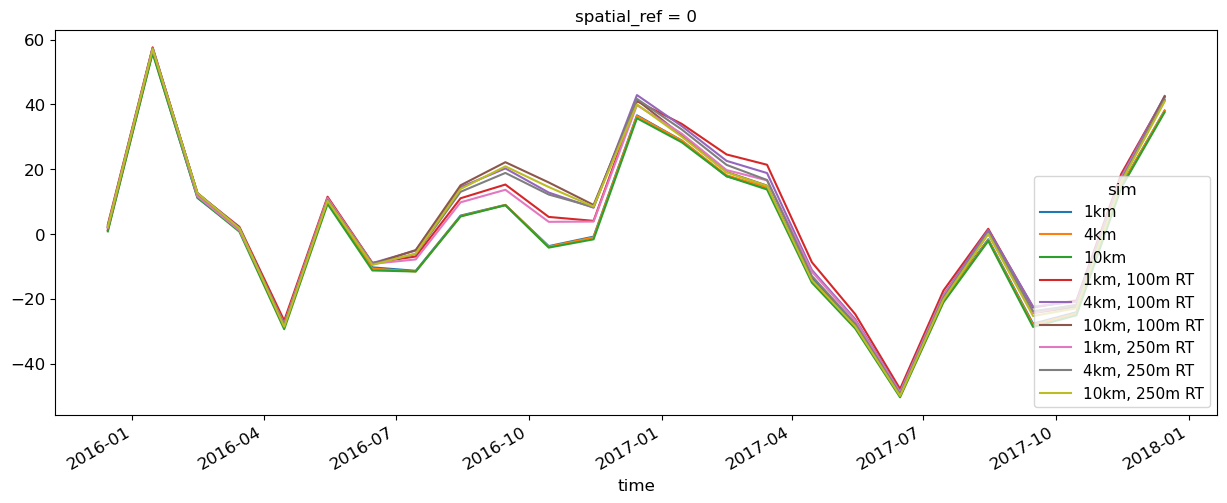

In [40]:
((da_mdl_domAvg - da_cmrset_avg_mmperday)/da_cmrset_avg_mmperday*100).plot(hue = 'sim', size = 5, aspect = 3)

In [49]:
((da_mdl_domAvg - da_cmrset_avg_mmperday)/da_cmrset_avg_mmperday*100).mean('sim').values

array([  1.88987679,  56.8906247 ,  12.05572374,   1.52615763,
       -28.10513684,  10.42997276,  -9.6781528 ,  -7.91924666,
        10.45010484,  15.3440547 ,   5.86347921,   4.27826895,
        39.5254017 ,  30.79986188,  20.04351343,  16.19720728,
       -12.79606228, -27.53864885, -49.35416323, -19.66194828,
        -0.1840024 , -25.22722356, -22.66143547,  16.32878403,
        40.53731117])

In [50]:
((da_mdl_domAvg - da_cmrset_avg_mmperday)/da_cmrset_avg_mmperday*100).mean('sim').time.values

array(['2015-12-15T00:00:00.000000000', '2016-01-15T00:00:00.000000000',
       '2016-02-15T00:00:00.000000000', '2016-03-15T00:00:00.000000000',
       '2016-04-15T00:00:00.000000000', '2016-05-15T00:00:00.000000000',
       '2016-06-15T00:00:00.000000000', '2016-07-15T00:00:00.000000000',
       '2016-08-15T00:00:00.000000000', '2016-09-15T00:00:00.000000000',
       '2016-10-15T00:00:00.000000000', '2016-11-15T00:00:00.000000000',
       '2016-12-15T00:00:00.000000000', '2017-01-15T00:00:00.000000000',
       '2017-02-15T00:00:00.000000000', '2017-03-15T00:00:00.000000000',
       '2017-04-15T00:00:00.000000000', '2017-05-15T00:00:00.000000000',
       '2017-06-15T00:00:00.000000000', '2017-07-15T00:00:00.000000000',
       '2017-08-15T00:00:00.000000000', '2017-09-15T00:00:00.000000000',
       '2017-10-15T00:00:00.000000000', '2017-11-15T00:00:00.000000000',
       '2017-12-15T00:00:00.000000000'], dtype='datetime64[ns]')

In [57]:
((da_mdl_domAvg - da_cmrset_avg_mmperday)/da_cmrset_avg_mmperday*100).groupby('time.season').mean('time').mean('sim')

<xarray.DataArray (season: 4)>
array([ 28.82033049, -12.72456809,  -6.71441839,  -1.01234536])
Coordinates:
    spatial_ref  int64 0
  * season       (season) object 'DJF' 'JJA' 'MAM' 'SON'

In [ ]:
((da_mdl_domAvg - da_cmrset_avg_mmperday)/da_cmrset_avg_mmperday*100).sel(time = slice('2016-12', '2017-02')).mean('sim').mean('time')

In [45]:
((da_mdl_domAvg - da_cmrset_avg_mmperday)/da_cmrset_avg_mmperday*100).sel(time = slice('2017-06', '2017-10')).mean('sim').mean('time')

<xarray.DataArray ()>
array(-23.41775459)
Coordinates:
    spatial_ref  int64 0

In [47]:
(da_mdl_domAvg - da_cmrset_avg_mmperday).sel(time = slice('2017-06', '2017-10')).mean('sim')

<xarray.DataArray (time: 5)>
array([-0.32491339, -0.14786692, -0.00212885, -0.423601  , -0.49994891])
Coordinates:
  * time         (time) datetime64[ns] 2017-06-15 2017-07-15 ... 2017-10-15
    spatial_ref  int64 ...

In [52]:
da_mdl_bias_wrt_dolce.count('sim')

<xarray.DataArray (time: 25)>
array([0, 9, 5, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 4, 1, 0, 6, 8, 0, 0, 4,
       9, 0, 0])
Coordinates:
  * time     (time) datetime64[ns] 2015-12-15 2016-01-15 ... 2017-12-15

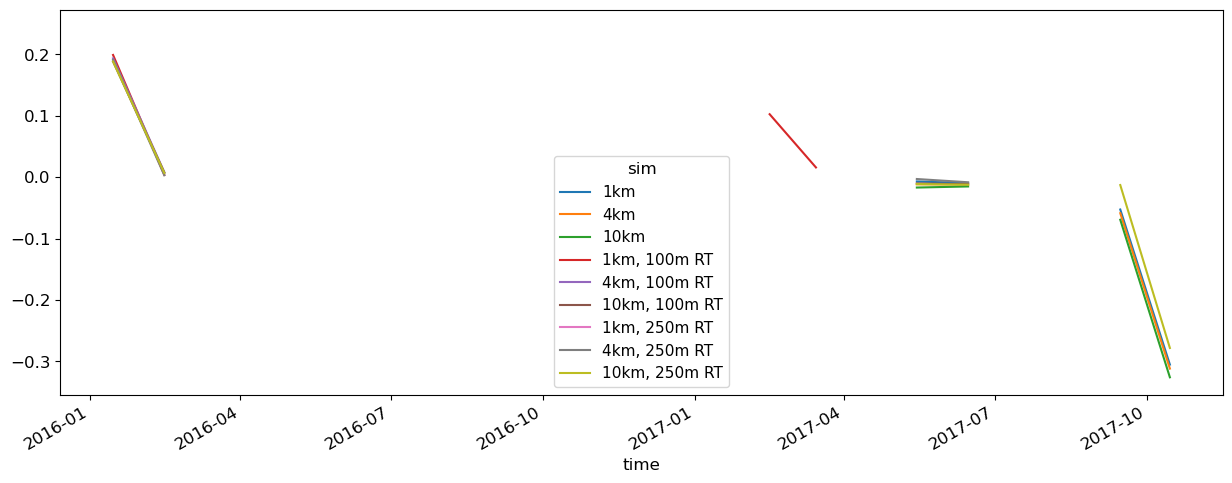

In [33]:
da_mdl_bias_wrt_dolce.plot(hue = 'sim', size = 5, aspect = 3)

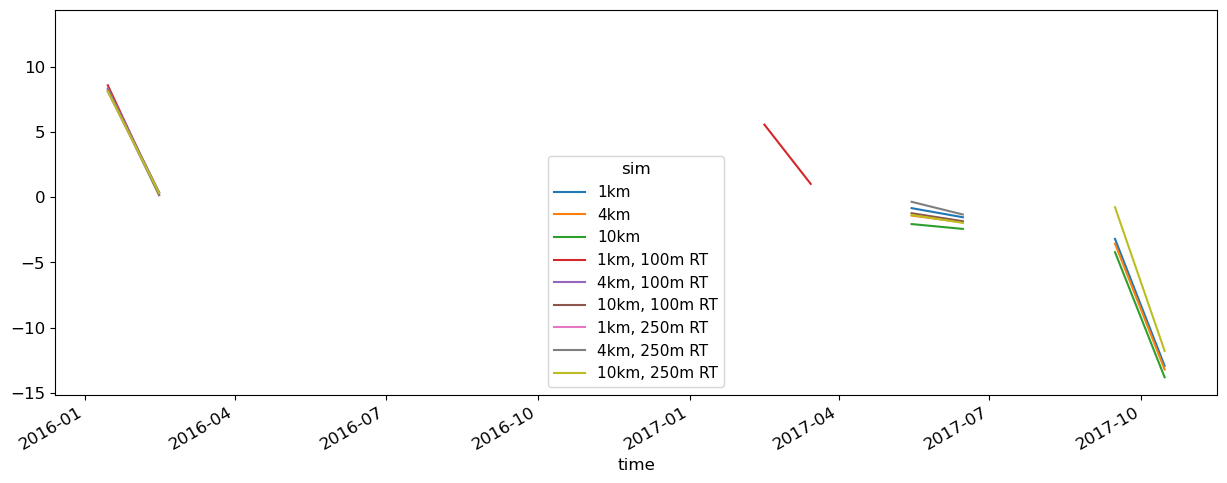

In [35]:
(da_mdl_bias_wrt_dolce/da_dolce_avg*100).plot(hue = 'sim', size = 5, aspect = 3)

In [36]:
(da_mdl_bias_wrt_dolce/da_dolce_avg*100).mean('sim')

<xarray.DataArray (time: 25)>
array([         nan,   7.95821185,   0.26826491,          nan,
                nan,          nan,          nan,          nan,
                nan,   8.77339598,          nan,          nan,
                nan,          nan,   2.94950174,   1.01609515,
                nan,  -1.21208658,  -1.56673601,          nan,
                nan,  -2.94093122, -11.57396046,          nan,
                nan])
Coordinates:
  * time     (time) datetime64[ns] 2015-12-15 2016-01-15 ... 2017-12-15